# 相关分析概述

* 相关性的测量指标
    * 皮尔逊相关(连续变量)
    * 斯皮尔曼相关(有序变量)
    * 肯德尔相关(分类变量)
    * 点二列相关(二分类变量)
* 相关性的显著性检验(以皮尔逊相关为例)
    * 已知两个样本间的相关性, 可以推断对应的两个总体的相关性吗?

## 配对样本≠相关样本
* 配对样本、配对t检验
    * 两个配对样本, 是对**同一被试的同一属性**在两个状态下的测量, 如: 
        * 同一病人的用药量(训练前、训练后)
        * 同卵双胞胎的GPA分数
    * 两个配对样本t检验的目标:
        * 两个配对样本对应总体的均值是否相等?
        * 同一个体两条件下得分差值的总体均值为0吗? $μ_{X_2-X_1}=0$ 吗? 
        * 两个条件下的得分有系统性差异吗?
* 相关样本、相关分析
    * 两个相关样本, 是对**同一被试的两个属性**的测量, 如: 
        * 同一病人的用药量、年龄
        * 同一病人的用身高、体重
        * 同一地区的通胀率、失业率
        * 同一天的下雨量、股市成交量
    * 相关分析的目标:
        * 一个样本的变化与另一样本的变化, 是否存在线性规律?
        * 不回答两个样本对应总体的均值是否相等
        * 例如, 对身高、体重的相关分析, 并不回答(总体的)身高均值是否等于体重均值, 对身高均值(170cm)与体重均值(60kg)的比较没有意义
    * 注意
        * 可将配对样本看作相关样本、进行相关分析. 例如, 配对样本"同一病人的用药量(训练前、训练后)",也可做相关分析
        * 通常, 不可将相关样本看作配对样本、进行配对样本t检验. 例如, 两个相关样本身高、体重**不应**进行配对样本t检验

## 相关关系≠因果关系
* 例子
    * 统计数据表明，一个人一生中欢度的生日越多, 他的寿命就越长. 因而, 庆贺生日, 有益于身心健康吗?
    * 100个新冠患者服用连花清瘟胶囊7天后, 有95人康复. 因而, 连花清瘟胶囊, 有益于治疗新冠吗?
* x导致y的因果关系, 需要满足:
    * x与y存在相关关系
    * x在y之前发生, 原因x在前、结果y在后
    * 排除其他全部解释
        * 在自然科学领域, 可通过"随机双盲实验", 排除其他全部解释
        * 在社会科学领域, 数据由现实中观察所得, 很难排除其他全部解释

# 皮尔逊相关(Pearson)

## 协方差与皮尔逊相关系数
* 离差平方和： 两个变量对应元素**离差乘积**的和, 一般用$SP$表示
* 协方差：两个变量对应元素**离差乘积**的均值
$$cov(X,Y)=\sigma _{XY}=\frac{SP}{N}=\frac{{\sum {\left( {\left[ {{X_i} - \overline {{X}} } \right] \times \left[ {{Y_i} - \overline {{Y}} } \right]} \right)} }}{N}=\frac{\sum{XY}}{N}-\overline X\overline Y$$
* 皮尔逊相关系数: 对协方差的标准化，取值介于+1和-1之间
$${r_{XY}} = \frac{{{\sigma _{XY}}}}{{{\sigma _X}\times {\sigma _Y}}}=\frac{\frac{\sum{XY}}{N}-\overline X\overline Y}{\sigma _X \times \sigma _Y}=\frac{SP}{\sqrt{SS_X × SS_Y}}$$

* 由皮尔逊相关系数的计算公式, 可得:
    * X与Y的散点更多分布在1、3象限, 则得到相关系数>0
    * X与Y的散点更多分布在2、4象限, 则得到相关系数<0
    * X与Y的散点均匀分布在4个象限, 则得到相关系数=0

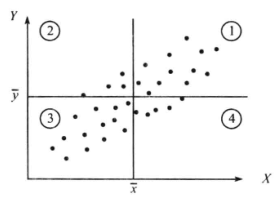

* 皮尔逊相关系数的含义
    * 衡量两组数据的线性相关性
    * 相关系数取值范围为-1到1, 负值为负相关, 0为不相关, 正值为正相关

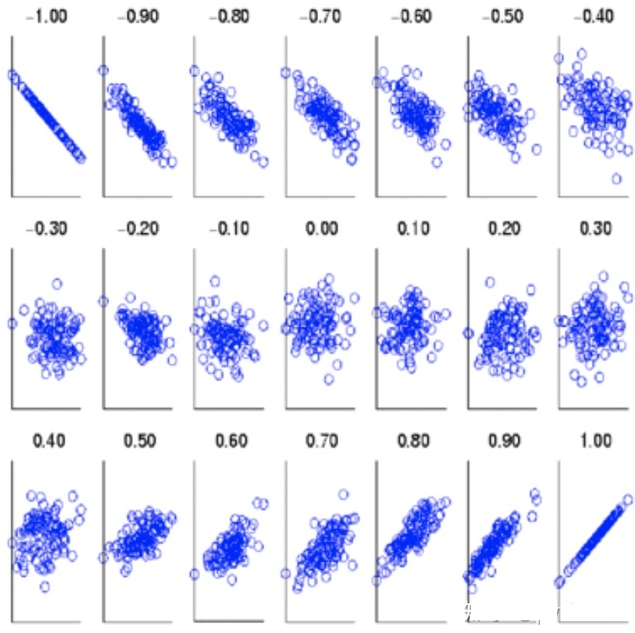

In [ ]:
import pandas as pd
data = pd.read_excel('8 相关分析.xlsx',sheet_name='yield')
data

In [ ]:
# IBM-yield与GE-yield的协方差
data['IBM-yield'].cov( data['GE-yield'], ddof=0 )  
# cov( )函数计算协方差时，分母为n-ddof，也即n-0，注意pandas中参数ddof默认值为1

In [ ]:
# IBM-yield与GE-yield的相关系数
data['IBM-yield'].corr(data['GE-yield'])  
# 计算相关系数时,分母相互抵消,不需考虑分母是n还是n-1,因此corr()函数无ddof参数

In [ ]:
import matplotlib.pylab as plt
plt.scatter(data['IBM-yield'],data['GE-yield'])

* 提示
    * 相关系数大小，不应作为线性关系判定的唯一指标，应作图观察变量间的关系！
* 例子
    * 下面4张图的相关系数都等于0.8
    * 只有a图, Y与X呈典型的线性关联, 相关系数才有意义

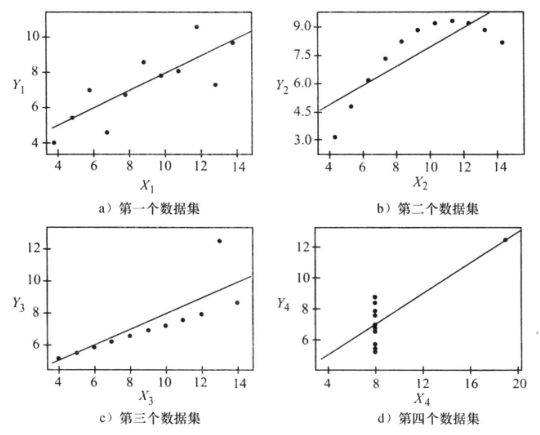

## 皮尔逊相关的显著性检验

* 皮尔逊相关的显著性检验
    * 已知两个样本间的相关性, 可以推断对应的两个总体的相关性吗?
* 皮尔逊相关显著性检验的前提
    * 样本是随机、独立数据
    * 样本应该广泛分布在X与Y的取值全距(见图)
    * 总体服从正态分布, 或大样本(n≥30)
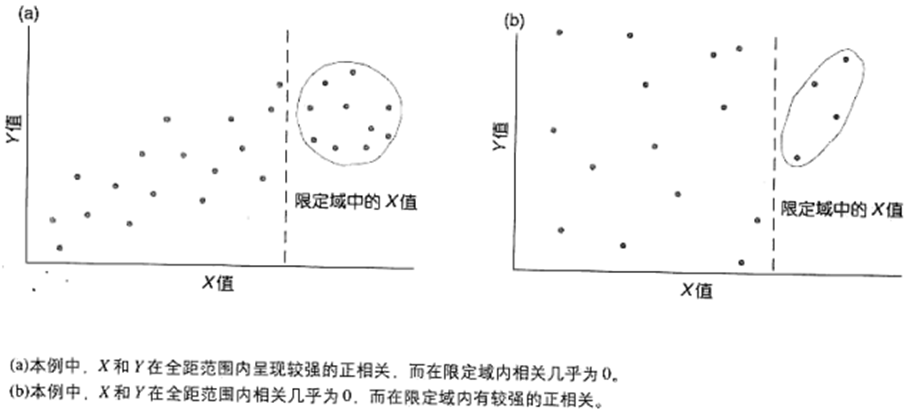

* 显著性检验的假设
    * 原假设: 总体的相关系数$r_p=0$(不相关)
    * 备择假设: 总体的相关系数$r_p≠0$(相关)
* 当原假设成立(总体的相关系数$r_p=0$)时
    * 若样本量很大, 样本的相关系数r(统计量)服从均值为$r_p$、标准误为$\sqrt{\frac{1}{n}}$的正态分布
    * 若样本量不大, 样本的相关系数r(统计量)服从均值为$r_p$、标准误为$\sqrt{\frac{1-r^2}{n-2}}$的t分布 

In [ ]:
from scipy import stats
stats.pearsonr(data['IBM-yield'], data['GE-yield'])

* 若上述数据为来自总体的随机独立样本
* p值>预先设定的显著水平α(=0.05), 接受原假设: 总体的相关系数$r_p=0$(不相关)
* 原假设错误时、接受了原假设, 就犯了第二类错误, 概率β未知

In [ ]:
import pingouin as pg
pg.corr(data['IBM-yield'], data['GE-yield'], method='pearson')

* 注意, p值>0.05, 置信度95%的置信区间[-0.15, 0.82]、包括0在内, 因而应接受原假设$r_p=0$

## 上证指数与深证指数日收益率的例子
* 已知2009-2013年间上证指数与深证指数日收益率的一个样本(随机独立抽样, 样本容量n=100天)
* 能推断出2009-2013年间上证指数与深证指数日收益率的相关性吗?

In [ ]:
import pandas as pd
sample = pd.read_excel('8 相关分析.xlsx',sheet_name='sample')
sample

In [ ]:
from scipy import stats
stats.pearsonr(sample['SHRet'], sample['SZRet'])

* p值远小于预先设定的显著水平α=0.05, 拒绝原假设: 总体的相关系数$r_p≠0$, 对应总体相关

In [ ]:
import pingouin as pg
pg.corr(sample['SHRet'], sample['SZRet'], method='pearson')

In [ ]:
# 2009-2013年间上证指数与深证指数日收益率的总体
population = pd.read_excel('8 相关分析.xlsx',sheet_name='population')
population

In [ ]:
# 随机独立抽样, 重新产生一个样本, 样本容量为10
sample_10 = population.sample(n=10,random_state=1234)
sample_10

In [ ]:
stats.pearsonr(sample_10['SHRet'], sample_10['SZRet'])

In [ ]:
# 对照: 总体的相关系数(不需要推断)
population['SHRet'].corr(population['SZRet'])

# 相关性的其他测量指标

* 皮尔逊(Pearson)相关系数, 测量两个变量间的线性相关性

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
x = np.arange(0,10,0.1)
y = []
for i in x:
    y.append(i**2 + np.random.normal())  # y=x**2+随机数
plt.plot(x,y)  
stats.pearsonr(x,y)
# x与y的相关系数很大、统计上显著, 但x与y不是线性关系、不宜使用Pearson相关系数

## 斯皮尔曼(Spearman)相关
* 斯皮尔曼(Spearman)相关系数的使用场景
    * 两个变量(X与Y)不是线性关系时, 可用斯皮尔曼相关来测度相关性
    * 两个变量(X与Y)有一个是定序变量时, 不能计算pearson相关系数, 可计算spearman相关系数
* 斯皮尔曼(Spearman)相关系数的原理
    * 先将两个变量转化为序数(等级), 再基于序数(等级)计算Pearson相关系数, 即可得Spearman相关系数
    * Spearman相关系数范围为-1到1、负值为负相关、0为不相关
    * 例如：调查问卷中的满意度（很不满意、不满意、一般、满意、很满意，是五级有序分类）, 适宜计算Spearman相关系数

In [ ]:
import pandas as pd
data = pd.read_excel('8 相关分析.xlsx',sheet_name='Spearman相关')
data

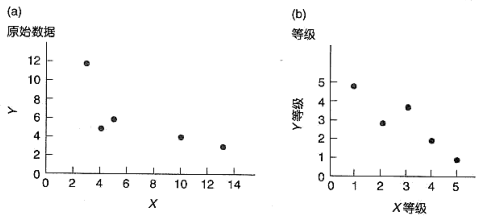

In [ ]:
data['X'].corr(data['Y'],method='pearson')   # X与Y的pearson相关系数

In [ ]:
data['X等级'].corr(data['Y等级'],method='pearson')   # X等级与Y等级的pearson相关系数, 也即X与Y的Spearman相关系数

In [ ]:
data['X'].corr(data['Y'],method='spearman')   # 直接计算X与Y的Spearman相关系数

* Spearman相关的显著性检验: 用样本推断总体相关性, 原假设$r_p=0$(不相关)
    * 两组数据是随机、独立、有序数据(连续型数据可看作特殊的有序数据)       
    * 不需要两组数据服从正态分布
    * 数据集元素大于500时较为可靠

In [ ]:
stats.spearmanr(data['X'], data['Y'])

In [ ]:
import pingouin as pg
pg.corr(data['X'], data['Y'], method='spearman')

## 肯德尔(Kendall)相关
* 两个变量(X与Y)有一个是分类变量时, 不能计算pearson与spearman相关系数, 可计算Kendall相关系数
* 相关系数1为极度相关、-1为极度不相关

In [ ]:
import pandas as pd
data = pd.read_excel('8 相关分析.xlsx',sheet_name='Kendall相关')
data
# 注意, 应事先将待分析的分类变量"病情"转化为数值变量"病情等级"

In [ ]:
# 将病情等级看作有序数据
data['体重'].corr(data['病情等级'],method='spearman')   # 计算Spearman相关系数

In [ ]:
# 将病情等级看作分类数据
data['体重'].corr(data['病情等级'],method='kendall')   # 计算kendall相关系数

In [ ]:
from scipy import stats
stats.kendalltau(data['体重'], data['病情等级'])    # 计算kendall相关系数

* p值>0.05, 接受原假设r=0、两个变量不相关

In [ ]:
import pingouin as pg
pg.corr(data['体重'], data['病情等级'], method='kendall')

## 点二列相关(point biserial correlation)
* 计算"连续型变量"与"二分类变量"的pearson相关系数, 所得结果叫点二列相关
* 注意, 应事先将"二分类变量"转化为数值变量(一般转换为0-1,取值不影响结果)

In [ ]:
import pandas as pd
data = pd.read_excel('8 相关分析.xlsx',sheet_name='点二列相关')
data

In [ ]:
data['记忆分数'].corr(data['处理条件'], method='pearson')

* 用样本推断总体时, 点二列相关系数的含义, **类似**两个独立样本t检验
    * 记点二列相关系数为 r, 有:
 $$r^{2}=\frac{t^{2}}{t^{2}+df}=\frac{分类引致的连续变量的变异性}{连续变量的总变异性}=\frac{可解释的变异性}{总的变异性}$$
    * 点二列相关系数的平方$r^2$, 表示二分类变量引致的变异性占比

In [ ]:
result = pg.ttest(x=data[data['处理条件']==1]['记忆分数'],   # 第1个样本
                 y=data[data['处理条件']==0]['记忆分数'],   # 第0个样本
                 alternative='two-sided')
result  # 两个独立样本t检验

In [ ]:
t = result['T']
df = result['dof']
( t**2 / (t**2+df) ) ** 0.5   # 结果=点二列相关系数 r